# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to implement them via Keras, its time to pratice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

You will be able to:
* Transform images into tensors
* Build a CNN model for image recognition

## Loading the Images

The data for this lab concerns classifying lung xray images for pneumonia. The original dataset is from kaggle. We have downsampled this dataset in order to reduce trainging time for you when you design and fit your model to the data. It is anticipated that this process will take approximately 1 hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **chest_xray**, of this repository.

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Using TensorFlow backend.


Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


## Designing the Model

Now it's time to design your CNN! Remember a few things when doing this: 
* You should alternate convolutional and pooling layers
* You should have later layers have a larger number of parameters in order to detect more abstract patterns
* Add some final dense layers to add a classifier to the convolutional base

In [2]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
                    MaxPooling2D((2, 2)), 
                    
                    Conv2D(64, (3, 3), activation='relu'), 
                    MaxPooling2D((2, 2)), 
                    
                    Conv2D(128, (3, 3), activation='relu'), 
                    MaxPooling2D((2, 2)), 
                    
                    Conv2D(128, (3, 3), activation='relu'), 
                    MaxPooling2D((2, 2)), 
                    
                    Flatten(), 
                    
                    Dense(512, activation='relu'), 
                    Dense(1, activation='sigmoid')])

Instructions for updating:
Colocations handled automatically by placer.


## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.**

In [3]:
from keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', 
              optimizer = RMSprop(lr = .0001), 
              metrics = ['acc'])

In [4]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100, 
                              epochs = 30, 
                              validation_data = validation_generator, 
                              validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 52s 521ms/step - loss: 0.4923 - acc: 0.7838 - val_loss: 1.1803 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 59s 589ms/step - loss: 0.2782 - acc: 0.8899 - val_loss: 0.9189 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 53s 534ms/step - loss: 0.2009 - acc: 0.9184 - val_loss: 1.7012 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 52s 523ms/step - loss: 0.1507 - acc: 0.9414 - val_loss: 1.5466 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 53s 535ms/step - loss: 0.1287 - acc: 0.9518 - val_loss: 0.8040 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 54s 536ms/step - loss: 0.1150 - acc: 0.9519 - val_loss: 1.3868 - val_acc: 0.7500
Epoch 7/30
100/100 [==============================] - 52s 516ms/step - loss: 0.1020 - acc: 0.9589 - val_loss: 1.5498 - val_acc: 0.5000
Epoch 8

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Save the Model

In [6]:
model.save('chest_xray_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.**

In [7]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 87s 870ms/step - loss: 4.0630 - acc: 0.7452 - val_loss: 7.4513 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 84s 842ms/step - loss: 4.0721 - acc: 0.7446 - val_loss: 7.4513 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 84s 839ms/step - loss: 3.9299 - acc: 0.7535 - val_loss: 7.4513 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 86s 860ms/step - loss: 4.2863 - acc: 0.7311 - val_loss: 7.4513 - val_acc: 0.5000
Epoch 5/100
100/100 [==============================] - 86s 857ms/step - loss: 3.9897 - acc: 0.7497 - val_loss: 7.4513 - val_acc: 0.5000
Epoch 6/100
100/100 [==============================] - 86s 860ms/step - loss: 4.0865 - acc: 0.7437 - val_loss: 7.4513 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 85s 845ms/step - loss: 3.9970 - acc: 0.7493 - va

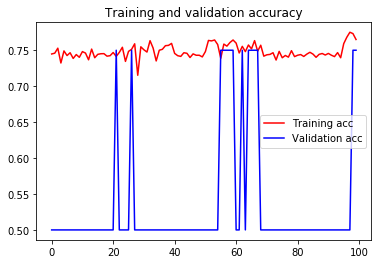

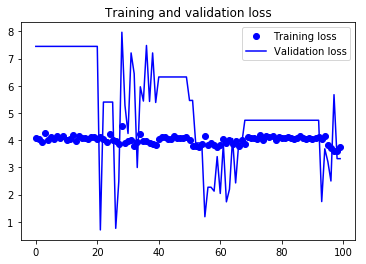

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
model.save('chest_xray_downsampled_with_augmentation_data.h5')

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice.

In [10]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 208 images belonging to 2 classes.
test acc: 0.8497899149646279


## Extension: Adding Data to the Model

As discussed, the current dataset we worked with is a subset of a dataset hosted on Kaggle. Increasing the data that we use to train the model will result in additional performance gains but will also result in longer training times and be more resource intensive.   

It is estimated that training on the full dataset will take approximately 4 hours (and potentially significantly longer) depending on your computer's specifications.

In order to test the impact of training on the full dataset, start by downloading the data from kaggle here: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.   

In [ ]:
#Optional extension; Your code here

## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.